In [1]:
import sys
sys.path.append('src')
import os
from src.dataloaders import *
from src.interp_utils import *
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
sst_zarr_path = 'input_data/mur_coarse_zarrs/'

start_date = datetime.date(2025,1,20)
end_date = datetime.date(2025,1,22)

mean_ssh = 0.074
std_ssh = 0.0986
mean_sst = 293.307
std_sst = 8.726

coord_grids = np.load('input_data/coord_grids.npy')


dataset = NeurOST_dataset(sst_zarr = sst_zarr_path,
                          start_date = start_date,
                          end_date = end_date,
                          N_t = 30,
                          mean_ssh = mean_ssh,
                          std_ssh = std_ssh,
                          mean_sst = mean_sst,
                          std_sst = std_sst,
                          coord_grids = coord_grids,
                          n = 128,
                          L_x = 960e3,
                          L_y = 960e3,
                          force_recache = False,
                          leave_out_altimeters = False,
                          withhold_sat = "random",
                          filtered = False,
                          use_sst = True,
                          time_bin_size = 10,
                          lon_bin_size = 10,
                          lat_bin_size = 10,
                          ssh_out_n_max = 1000,
                         )

Using existing cache: sla_cache_2025-01-20_2025-01-22.h5, offset by 0 days


In [18]:
x,y = dataset.__getitem__(1*500)

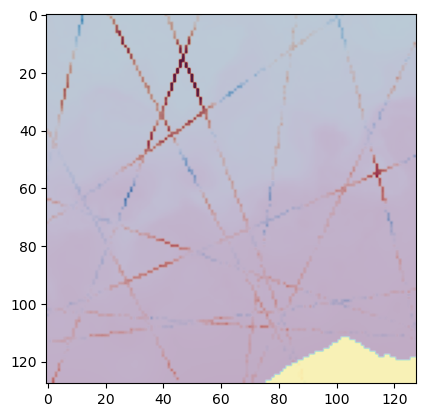

In [19]:
plt.imshow(x[0,1,])
plt.imshow(x[0,0,],alpha=0.7,cmap='RdBu_r',clim=(-3,3))

In [2]:
t = np.arange(3)
r = np.arange(5615)
t, r = np.meshgrid(t, r)
t, r = t.ravel(), r.ravel()

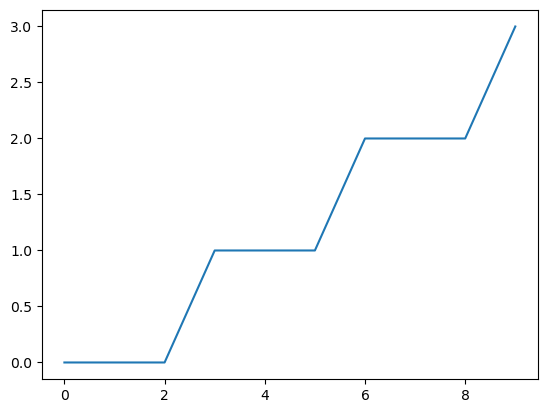

In [6]:
plt.plot(r[:10])

In [7]:
ds_mdt = xr.open_dataset('input_data/auxilliary/mdt_currents_0.1degree_grid.nc')
ds_mdt

<xarray.Dataset> Size: 259MB
Dimensions:                 (latitude: 1500, longitude: 3600)
Coordinates:
    time                    datetime64[ns] 8B ...
  * longitude               (longitude) float64 29kB 0.1 0.2 0.3 ... 359.9 360.0
  * latitude                (latitude) float64 12kB -70.0 -69.9 ... 79.8 79.9
    Lambert_Azimuthal_Grid  int32 4B ...
Data variables:
    err_mdt                 (latitude, longitude) float64 43MB ...
    crs                     int32 4B ...
    u                       (latitude, longitude) float64 43MB ...
    v                       (latitude, longitude) float64 43MB ...
    err_v                   (latitude, longitude) float64 43MB ...
    mdt                     (latitude, longitude) float64 43MB ...
    err_u                   (latitude, longitude) float64 43MB ...
Attributes: (12/40)
    cdm_data_type:                                  Grid
    history:                                        2020-07-29T10:52:01Z : Cr...
    Conventions:                                    CF-1.6
    FROM_ORIGINAL_FILE__Metadata_Conventions:       Unidata Dataset Discovery...
    contact:                                        servicedesk.cmems@mercato...
    creator_email:                                  servicedesk.cmems@mercato...
    ...                                             ...
    time_coverage_duration:                         P20Y
    time_coverage_start:                            1993-01-01T00:00:00Z
    time_coverage_resolution:                       P20Y
    time_coverage_end:                              2013-01-01T00:00:00Z
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...
    comment:

In [30]:
ds = xr.open_dataset('predictions/merged_products/NeurOST_SSH-SST/NeurOST_SSH-SST_L250km_20250121_20250401.nc')
ds

<xarray.Dataset> Size: 475MB
Dimensions:    (latitude: 1500, longitude: 3600, time: 1)
Coordinates:
  * longitude  (longitude) float64 29kB 0.1 0.2 0.3 0.4 ... 359.8 359.9 360.0
  * latitude   (latitude) float64 12kB -70.0 -69.9 -69.8 ... 79.7 79.8 79.9
  * time       (time) datetime64[ns] 8B 2025-01-21
Data variables:
    sla        (latitude, longitude, time) float64 43MB ...
    adt        (latitude, longitude, time) float64 43MB ...
    dSLA_dx    (latitude, longitude, time) float64 43MB ...
    dSLA_dy    (latitude, longitude, time) float64 43MB ...
    ugosa      (latitude, longitude, time) float64 43MB ...
    vgosa      (latitude, longitude, time) float64 43MB ...
    ugos       (latitude, longitude, time) float64 43MB ...
    vgos       (latitude, longitude, time) float64 43MB ...
    zeta       (latitude, longitude, time) float64 43MB ...
    sn         (latitude, longitude, time) float64 43MB ...
    ss         (latitude, longitude, time) float64 43MB ...

In [19]:
del ds

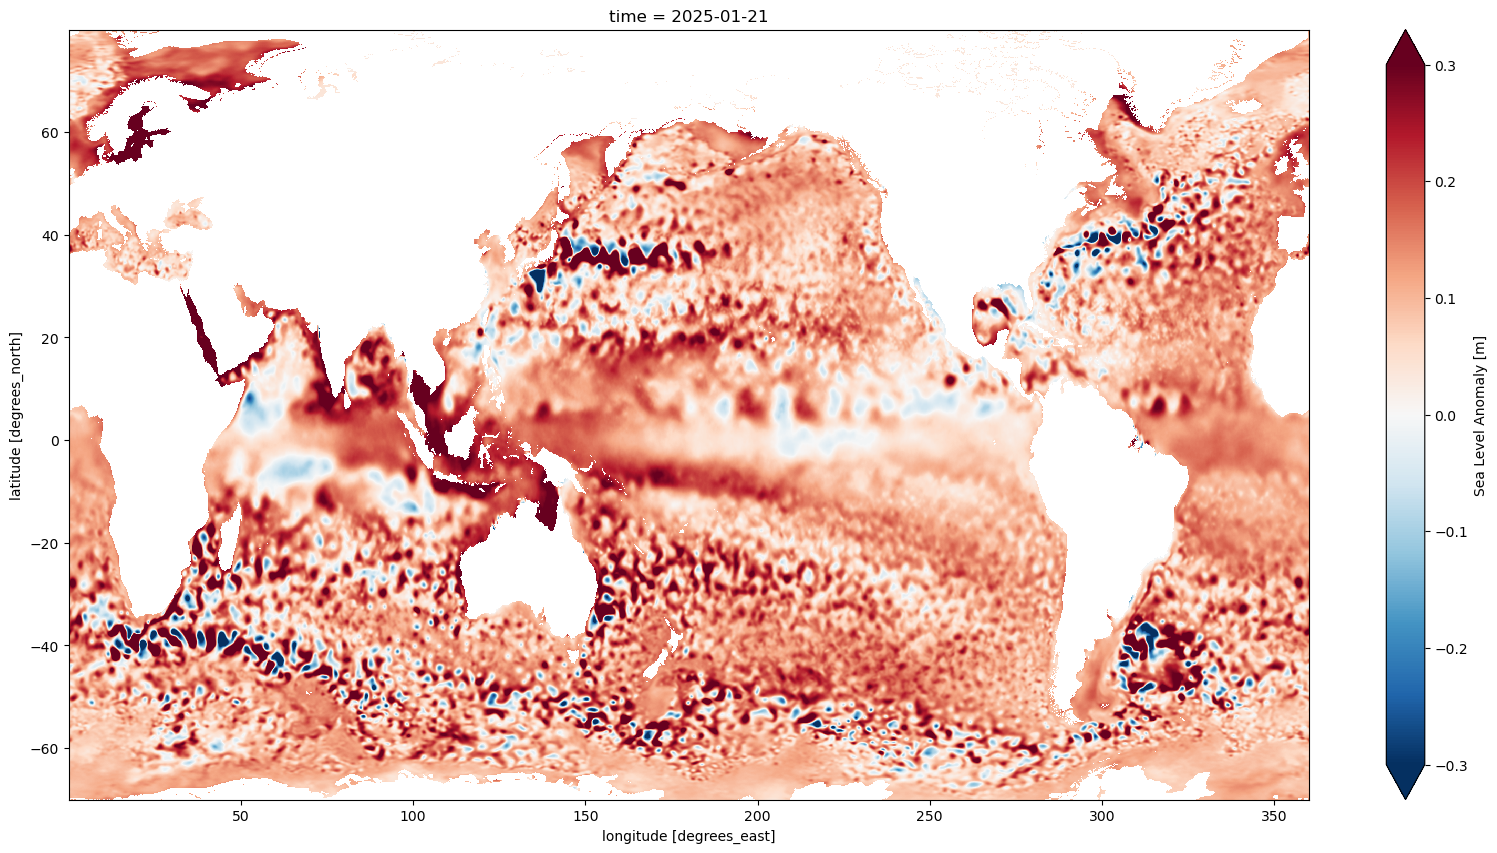

In [34]:
ds['sla'].plot(figsize = (20,10), cmap = 'RdBu_r',vmin = -0.3, vmax = 0.3)


In [27]:
ds_mdt = xr.open_dataset('input_data/auxilliary/mdt_hybrid_cnes_cls18_cmems2020_global.nc')[['mdt','u','v']]
ds_mdt

<xarray.Dataset> Size: 100MB
Dimensions:    (time: 1, latitude: 1440, longitude: 2880)
Coordinates:
  * time       (time) datetime64[ns] 8B 2003-01-01
  * latitude   (latitude) float32 6kB -89.94 -89.81 -89.69 ... 89.69 89.81 89.94
  * longitude  (longitude) float32 12kB -179.9 -179.8 -179.7 ... 179.8 179.9
Data variables:
    mdt        (time, latitude, longitude) float64 33MB ...
    u          (time, latitude, longitude) float64 33MB ...
    v          (time, latitude, longitude) float64 33MB ...
Attributes: (12/38)
    cdm_data_type:                   Grid
    history:                         2020-07-29T10:52:01Z : Creation 
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    contact:                         servicedesk.cmems@mercator-ocean.eu, smu...
    creator_email:                   servicedesk.cmems@mercator-ocean.eu 
    ...                              ...
    title:                           MDT_HYBRID_CNES-CLS18_CMEMS2020_GLOBAL
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    time_coverage_duration:          P20Y
    time_coverage_start:             1993-01-01T00:00:00Z
    time_coverage_resolution:        P20Y
    time_coverage_end:               2013-01-01T00:00:00Z

In [29]:
del ds